<h3>Кубическая норма

In [1]:
# Дальше будет использоваться для определения нормы Якобиана
def cubic_norm(A):
    x = 0
    sum = 0
    for i in range(len(A)):
        sum = 0
        for j in range(len(A[i])):
            sum += abs(A[i][j])
        if sum > x:
            x = sum
    return x


<h3>Создание пустой матрицы</h3>

In [2]:
# Используется для решения СЛАУ
def create_matrix(x, y):  # x - размерность матрицы
    A = []
    for i in range(x):
        A.append([0]*y)
    return A


<h3>Создание единичной матрицы</h3>

In [3]:
# Используется для решения СЛАУ
def create_I_matrix(x):  # x - размерность матрицы
    A = []
    for i in range(x):
        A.append([0]*x)
        A[i][i] = 1
    return A


<h3> Произведение матриц </h3>

In [4]:
# Используется для решения СЛАУ
def matrix_product(A, B):
    n = len(A)
    m = len(B[0])
    R = create_matrix(n, m)
    for i in range(n):
        for j in range(m):
            for k in range(n):
                R[i][j] += A[i][k] * B[k][j]
    return R


<h3>Решение системы ЛУ при треугольных матрицах

In [5]:
# Используется для решения СЛАУ
def solution(A, q, b):
    # q определяет A - это нижняя треугольная матрица или верхняя
    n = len(A)
    x = []
    if q:
        for i in range(n):
            x.append([0] * len(b[i]))
            for k in range(len(b[i])):
                for j in range(i+1):
                    if i == j:
                        x[i][k] += b[i][k] / A[i][i]
                    else:
                        x[i][k] -= A[i][j] * x[j][k] / A[i][i]
    else:
        for i in range(n):
            x.append([0] * len(b[i]))
        for i in range(n-1, -1, -1):
            for k in range(len(b[i])):
                for j in range(n-1, i-1, -1):
                    if i == j:
                        x[i][k] += b[i][k] / A[i][i]
                    else:
                        x[i][k] -= A[i][j] * x[j][k] / A[i][i]
    return x


<h2>LU разложение</h2>

In [6]:
# Используется для решения СЛАУ
def LU(A):  # Собственно реализация LU разложения
    U = []
    for i in A:
        U.append(i.copy())
    n = len(A)
    L = create_matrix(n, n)
    for i in range(n):
        for j in range(n):
            # Выбор главного элемента
            m = j
            for k in range(j+1, n):
                if U[i][k] > U[i][m]:
                    m = k
            if m != j:
                for k in range(n):
                    x = U[i][m]
                    U[i][m] = U[i][j]
                    U[i][j] = x

            U[0][i] = A[0][i]
            L[i][0] = A[i][0] / U[0][0]
            sum = 0
            for k in range(i):
                sum += L[i][k] * U[k][j]
            U[i][j] = A[i][j] - sum
            if (i > j):
                L[j][i] = 0
            else:
                sum = 0
                for k in range(i):
                    sum += L[j][k] * U[k][i]
                L[j][i] = (A[j][i] - sum) / U[i][i]
    return L, U


<h1>TEST

In [7]:
from math import cos, sin, asin
def f(x,y):
    return 0.8-cos(y-1)
def g(x,y):
    return 2+cos(x)
def F(x,y):
    return f(x,y)**2+g(x,y)**2

def ff(x):
    return cos(x)-1.2
def gg(x):
    try:
        return asin(2*x-2)+0.5
    except:
        return None

def jacobian(x,y):
    A = [[0, sin(y-1)], 
         [-sin(x), 0]]
    return cubic_norm(A)
def fsh(x,y):
    return sin(y-1)

def gsh(x,y):
    return -sin(x)




x0 = 0.9
y0 = 2.6
e = 10 **(-10)

<h2> Вариант 24

In [25]:
from math import cos, sin, asin, acos, pi

# Основные функции f & g
def f(x,y):
    return cos(x)+y-1.2
def g(x,y):
    return 2*x-sin(y-0.5)-2
# F для метода градиентного спуска
def F(x,y):
    return f(x,y)**2+g(x,y)**2
# преобразованные функции для графиков
def ff(x):
    return 1.2 - cos(x)
def gg(x):
    return 1 + sin(x-0.5) / 2
# Собственно, Якобиан
def jac(x,y):
    return [[-sin(x), 1], [2, -cos(y-0.5)]]
def jacobian(x,y):
    return cubic_norm(jac(x,y))
# Функции для преобразования x & y
def pfix(x,y):
    return sin(y-0.5)/2 +1
def pfiy(x,y):
    return 1.2-cos(x)
def Fsh_x(x,y):
    return -2*sin(x)*cos(x)-2*y*sin(x)+2.4*sin(x)-4*sin(y-0.5)+8*x-8
def Fsh_y(x,y):
    return 2*cos(x)+2*y-2.4+cos(y-0.5)*(-4*x+4+2*sin(y-0.5))

# Начальные значения и точность
x0, y0 = 1.139, 0.78
e = 10 **(-12)
arr1 = 0
arr2 = 2
q = -1
xid, yid = 1.1388173974691207, 0.7813312360330628

<h2> Вариант 25

In [20]:
from math import cos, sin
# Основные функции f & g
def g(x,y):
    return cos(y+0.5)+x-0.8
def f(x,y):
    return sin(x)-2*y-1.6
# F для метода градиентного спуска
def F(x,y):
    return f(x,y)**2+g(x,y)**2
# преобразованные функции для графиков
def gg(x):
    return 0.8 - cos(x+0.5)
def ff(x):
    return (sin(x)-1.6)/2
    
# Собственно, Якобиан
def jac(x,y):
    return [[1, -sin(y+0.5)], [cos(x), -2]]
def jacobian(x,y):
    return cubic_norm(jac(x,y))
# Функции для преобразования x & y
def pfix(x,y):
    return (0.8 - cos(y + 0.5))
def pfiy(x,y):
    return (sin(x) / 2 - 0.8)
def Fsh_x(x,y):
    return 2*cos(y+0.5)+2*x-1.6+ cos(x)*(2*sin(x)-4*y-3.2)
def Fsh_y(x,y):
    return 2*sin(y+0.5)*(-cos(y+0.5)-2*x+1.6)-4*sin(x)+8*y+6.4

x0, y0 = -0.13, -0.9
e = 10 **(-12)
arr1 = -2
arr2 = 3
q = 1
xid, yid = -0.13355832611734098, -0.8665808075387158

<h1>Метод Ньютона

In [27]:
def b(x,y):
    return [[g(x,y)], [f(x,y)]]

x,y = x0,y0
prevx,  prevy = 0, 0
while abs(prevx - x) >= e or abs(prevy - y) >= e:
    w = jac(x,y)
    L,U = LU(w)
    Y = solution(L, True, b(x,y))
    X = solution(U, False, Y)
    prevx, prevy = x, y
    x -= X[0][0]
    y -= q * X[1][0]
    print(x, ",", y, X[0][0], X[1][0])


1.1389261490878246 , 0.781711423975126 7.385091217539824e-05 0.00171142397512605
1.1388024113129298 , 0.7816760825238437 0.00012373777489474693 -3.534145128231169e-05
1.1387922600995626 , 0.7813240559407026 1.0151213367309516e-05 -0.00035202658314104627
1.1388153395353937 , 0.7812597199347576 -2.307943583123124e-05 -6.433600594501746e-05
1.1388220760637515 , 0.7813181916427503 -6.736528357848329e-06 5.8471707992688e-05
1.1388187634755171 , 0.781343088724911 3.3125882343123457e-06 2.4897082160668516e-05
1.1388167256781612 , 0.7813362846383252 2.037797355992638e-06 -6.804086585811364e-06
1.1388169842157145 , 0.7813298561440892 -2.585375534695217e-07 -6.428494235879515e-06
1.1388174498975363 , 0.7813299323747663 -4.656818217242542e-07 7.623067707194733e-08
1.13881749190354 , 0.7813312514917191 -4.200600387662515e-08 1.3191169527474194e-06
1.1388174059874754 , 0.781331503533367 8.591606477788116e-08 2.5204164792526863e-07
1.1388173800462824 , 0.781331287144314 2.594119299583304e-08 -2.1638

<h1>Метод простой итерации

In [29]:
def q(x,y):
    return (pfix(x,y), pfiy(x,y))

prevx, prevy =  x0, y0
x, y = q(x0, y0)

print("""
 Метод простой итерации 
 Fi1(x,y)=cos(x)+y-1.2
 Fi2(x,y)=2*x-sin(y-0.5)-2
 Якобиан 
|-sin(x)     1      |
|   2    -cos(y-0.5)|""")
print("""
Значение 
|-0.9080723847057184           1        |
|        2           -0.9606406373319826|
Norma={}""".format(jacobian(x,y)))
print("""
Itr             x                y               Норма невязки            Погрешность             Норма якобиана""")
i = 0



while abs(prevx - x) >= e or abs(prevy - y) >= e:
    i+=1
    prevx, prevy = x,y
    x,y = q(x,y,)
    print("""{:<3}|{:<20}|{:<20}|{:<25}|{:<22}|{:<20}|""".format(i, x, y, F(x,y),max(abs(prevx - x), abs(prevy - y)),  jacobian(x,y)))
lx, ly = x, y



 Метод простой итерации 
 Fi1(x,y)=cos(x)+y-1.2
 Fi2(x,y)=2*x-sin(y-0.5)-2
 Якобиан 
|-sin(x)     1      |
|   2    -cos(y-0.5)|

Значение 
|-0.9080723847057184           1        |
|        2           -0.9606406373319826|
Norma=2.9606406373319825

Itr             x                y               Норма невязки            Погрешность             Норма якобиана
1  |1.1388970535202263  |0.7807505003391549  |9.409755472655297e-07    |0.0007465711550446175 |2.9608477626646765  |
2  |1.1385384215500212  |0.7814035761288247  |4.997528059983296e-07    |0.000653075789669777  |2.9606666055948176  |
3  |1.1388521451895248  |0.7810779034126438  |1.7905394137206524e-07   |0.00032567271618089144|2.9607569953583064  |
4  |1.1386957063773782  |0.7813627920463037  |9.509287559471754e-08    |0.00028488863365982997|2.9606779307105513  |
5  |1.1388325551209921  |0.781220726705422   |3.407147628801826e-08    |0.00014206534088168077|2.9607173676044853  |
6  |1.1387643142013715  |0.7813450013361611  |1.809

<h1>Метод градиентного спуска

In [28]:
prevx, prevy =  0, 0
x, y = x0, y0
def alp(x,y):
    a_min = 20
    F_min = F(x,y)
    a = a_min
    for i in range(150):
        FF = F(x - a * Fsh_x(x,y), y - a * Fsh_y(x,y))
        if FF < F_min:
            F_min = FF
            a_min = a
        a /= 2
    return a_min
i = 0
while abs(prevx - x) >= e or abs(prevy - y) >= e:
    i+=1
    alpha = alp(x,y)
    prevx, prevy = x,y
    x -= alpha * Fsh_x(x,y)
    y -= alpha * Fsh_y(x,y)
    print("""{:<3}|{:<20}|{:<20}|{:<25}|{:<22}|{:<20}|""".format(i, x, y, F(x,y),max(abs(prevx - x), abs(prevy - y)),  jacobian(x,y)))
lx, ly = x, y

1  |1.138273692761154   |0.7801596575514891  |4.609895028631474e-07    |0.0007263072388459246 |2.9610113037958605  |
2  |1.138165558828768   |0.780223513634951   |3.233828319535549e-07    |0.0001081339323860675 |2.960993645049366   |
3  |1.138172022699117   |0.7804136046414586  |2.773211268929787e-07    |0.0001900910065075756 |2.9609410541317915  |
4  |1.1382528161050547  |0.7804397228873979  |2.1784011516505744e-07   |8.07934059376958e-05  |2.960933825497931   |
5  |1.1383785698901634  |0.7807352106502761  |1.3205816800878588e-07   |0.0002954877628781327 |2.960851998971092   |
6  |1.1384458602912895  |0.7807500368235565  |9.355418718409734e-08    |6.729040112607443e-05 |2.960847891094012   |
7  |1.1384921006487543  |0.7808116680370281  |7.318085735406273e-08    |6.163121347158018e-05 |2.960830812714561   |
8  |1.1386161960952759  |0.7813489727253415  |2.161106955099069e-07    |0.000537304688313478  |2.9606817677620976  |
9  |1.1387757118920105  |0.7813252141037497  |7.03298539571213e-

<h2>График функций

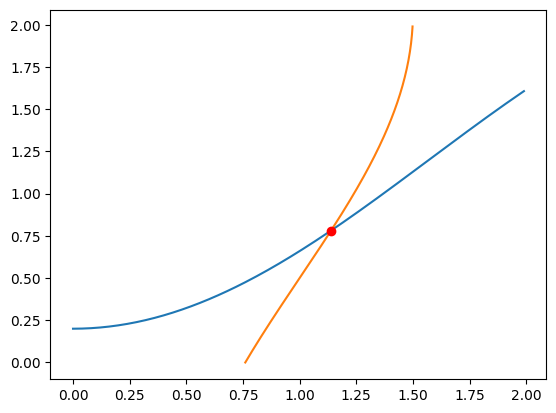

In [30]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(arr1, arr2, 0.01)
y1=[]
y2=[]
dx=0
dy=0
fi=10000
for i in x:
    y1.append(ff(i))
    y2.append(gg(i))
for i in enumerate(x):
    for j in enumerate(x):
        if (y1[i[0]] - j[1]) ** 2 + (y2[j[0]] - i[1]) ** 2  < fi:
            fi = (y1[i[0]] - j[1]) ** 2 + (y2[j[0]] - i[1]) ** 2
            dx = i[1]
            dy = y1[i[0]]
plt.plot(x, y1, y2, x, dx, dy, lx, ly,"ro")
plt.show()